<h1><b>This script has the only porpose of creating CSV's containing the pixel information of each face from the folder of train and test data.</b></h1>

In [1]:
# LIBRARIES
import numpy as np
import pandas as pd
import cv2 as cv
from glob import glob
import pickle
from joblib import Parallel, delayed
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='serif')
import dlib

import warnings
warnings.filterwarnings('ignore') 
from skimage.feature import hog
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # Adding standardization --> all attributes are on the same scale
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, accuracy_score, f1_score, recall_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [2]:
# FUNCTIONS
def images_to_dataframe(label,file_path):
    dataframe = pd.DataFrame()
    count = 1
    list_all_images = glob(pathname=file_path)
    for image in list_all_images:
        img = cv.imread(image)
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        row = np.append(label,img_gray.flatten())
        row = row.reshape(1,-1)
        dataframe = pd.concat([dataframe,pd.DataFrame(row)])
        print(f'{count} out of {len(list_all_images)} from {file_path}')
        count += 1
    return dataframe
def image_to_inp(image):
    dataframe = pd.DataFrame()
    row = np.array(image.flatten())
    row = row.reshape(1,-1)
    dataframe = pd.DataFrame(row)
    return dataframe

def image_to_dataframe(file_path):
    dataframe = pd.DataFrame()
    img = cv.imread(file_path)
#     img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    facecasc = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv.rectangle(img, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv.resize(roi_gray, (48, 48)), -1), 0)
        row = np.array(cropped_img.flatten())
        row = row.reshape(1,-1)
        dataframe = pd.DataFrame(row)
        break
    return dataframe
    

# def split_train_test_dataframes(dataframe, train_prop=0.75, test_prop=0.25):
#     """
#     ...
#     """

#     validate_prop = train_prop + test_prop
#     if validate_prop != 1:
#         print('train_prop + test_prop should greater than zero. Instead is {}'.format(validate_prop))
#         return None,None,None

#     n_obs = dataframe.shape[0]

#     idx_train = int(n_obs * train_prop)

#     df_train = dataframe.iloc[ :idx_train, : ]
#     df_test = dataframe.iloc[ idx_train: , : ]

#     return df_train, df_test

def create_final_dataframe(list_dataframes):
    df = pd.concat(list_dataframes)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [3]:
file_path_Happy_test = 'C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg'
file_path_Happy_train = 'C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg'
file_path_UnHappy_test = 'C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg'
file_path_UnHappy_train = 'C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg'

file_path_train_data = 'C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/training_data.csv'
file_path_test_data = 'C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/testing_data.csv'

In [4]:
# Create dataframes
df_Happy_test = images_to_dataframe(label=1,file_path=file_path_Happy_test)
print(' ')
df_Happy_train = images_to_dataframe(label=1,file_path=file_path_Happy_train)
print(' ')
df_UnHappy_test = images_to_dataframe(label=0,file_path=file_path_UnHappy_test)
print(' ')
df_UnHappy_train = images_to_dataframe(label=0,file_path=file_path_UnHappy_train)
print(' ')

1 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
2 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
3 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
4 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
5 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
6 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
7 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
8 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
9 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
10 out of 1774 from C:/Users/Rishi Ar

110 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
111 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
112 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
113 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
114 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
115 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
116 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
117 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
118 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
119 out of 1774 fro

219 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
220 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
221 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
222 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
223 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
224 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
225 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
226 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
227 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
228 out of 1774 fro

301 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
302 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
303 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
304 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
305 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
306 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
307 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
308 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
309 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
310 out of 1774 fro

380 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
381 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
382 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
383 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
384 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
385 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
386 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
387 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
388 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
389 out of 1774 fro

489 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
490 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
491 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
492 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
493 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
494 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
495 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
496 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
497 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
498 out of 1774 fro

583 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
584 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
585 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
586 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
587 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
588 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
589 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
590 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
591 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
592 out of 1774 fro

670 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
671 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
672 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
673 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
674 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
675 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
676 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
677 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
678 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
679 out of 1774 fro

746 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
747 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
748 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
749 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
750 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
751 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
752 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
753 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
754 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
755 out of 1774 fro

824 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
825 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
826 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
827 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
828 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
829 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
830 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
831 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
832 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
833 out of 1774 fro

921 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
922 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
923 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
924 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
925 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
926 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
927 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
928 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
929 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
930 out of 1774 fro

1011 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1012 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1013 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1014 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1015 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1016 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1017 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1018 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1019 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1020 out o

1093 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1094 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1095 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1096 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1097 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1098 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1099 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1100 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1101 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1102 out o

1170 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1171 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1172 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1173 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1174 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1175 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1176 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1177 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1178 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1179 out o

1258 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1259 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1260 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1261 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1262 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1263 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1264 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1265 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1266 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1267 out o

1342 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1343 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1344 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1345 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1346 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1347 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1348 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1349 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1350 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1351 out o

1426 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1427 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1428 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1429 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1430 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1431 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1432 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1433 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1434 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1435 out o

1507 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1508 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1509 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1510 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1511 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1512 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1513 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1514 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1515 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1516 out o

1583 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1584 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1585 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1586 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1587 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1588 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1589 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1590 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1591 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1592 out o

1670 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1671 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1672 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1673 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1674 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1675 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1676 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1677 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1678 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1679 out o

1758 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1759 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1760 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1761 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1762 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1763 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1764 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1765 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1766 out of 1774 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/Happy/*.jpg
1767 out o

85 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
86 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
87 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
88 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
89 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
90 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
91 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
92 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
93 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
94 out of 7215 from

204 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
205 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
206 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
207 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
208 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
209 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
210 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
211 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
212 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
213 out of

303 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
304 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
305 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
306 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
307 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
308 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
309 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
310 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
311 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
312 out of

386 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
387 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
388 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
389 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
390 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
391 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
392 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
393 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
394 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
395 out of

467 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
468 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
469 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
470 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
471 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
472 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
473 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
474 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
475 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
476 out of

559 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
560 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
561 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
562 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
563 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
564 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
565 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
566 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
567 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
568 out of

651 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
652 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
653 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
654 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
655 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
656 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
657 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
658 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
659 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
660 out of

735 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
736 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
737 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
738 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
739 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
740 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
741 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
742 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
743 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
744 out of

813 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
814 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
815 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
816 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
817 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
818 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
819 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
820 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
821 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
822 out of

888 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
889 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
890 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
891 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
892 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
893 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
894 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
895 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
896 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
897 out of

975 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
976 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
977 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
978 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
979 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
980 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
981 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
982 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
983 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
984 out of

1055 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1056 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1057 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1058 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1059 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1060 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1061 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1062 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1063 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1133 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1134 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1135 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1136 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1137 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1138 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1139 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1140 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1141 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1209 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1210 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1211 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1212 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1213 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1214 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1215 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1216 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1217 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1283 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1284 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1285 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1286 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1287 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1288 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1289 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1290 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1291 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1371 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1372 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1373 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1374 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1375 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1376 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1377 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1378 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1379 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1451 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1452 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1453 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1454 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1455 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1456 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1457 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1458 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1459 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1531 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1532 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1533 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1534 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1535 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1536 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1537 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1538 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1539 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1609 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1610 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1611 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1612 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1613 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1614 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1615 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1616 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1617 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1684 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1685 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1686 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1687 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1688 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1689 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1690 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1691 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1692 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1772 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1773 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1774 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1775 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1776 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1777 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1778 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1779 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1780 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1855 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1856 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1857 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1858 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1859 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1860 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1861 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1862 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1863 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

1935 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1936 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1937 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1938 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1939 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1940 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1941 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1942 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1943 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
1

2011 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2012 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2013 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2014 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2015 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2016 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2017 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2018 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2019 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2095 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2096 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2097 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2098 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2099 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2100 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2101 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2102 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2103 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2180 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2181 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2182 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2183 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2184 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2185 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2186 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2187 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2188 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2262 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2263 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2264 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2265 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2266 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2267 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2268 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2269 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2270 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2343 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2344 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2345 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2346 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2347 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2348 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2349 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2350 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2351 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2420 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2421 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2422 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2423 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2424 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2425 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2426 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2427 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2428 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2494 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2495 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2496 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2497 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2498 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2499 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2500 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2501 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2502 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2574 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2575 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2576 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2577 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2578 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2579 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2580 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2581 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2582 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2653 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2654 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2655 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2656 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2657 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2658 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2659 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2660 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2661 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2733 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2734 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2735 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2736 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2737 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2738 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2739 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2740 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2741 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2812 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2813 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2814 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2815 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2816 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2817 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2818 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2819 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2820 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2888 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2889 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2890 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2891 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2892 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2893 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2894 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2895 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2896 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

2962 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2963 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2964 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2965 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2966 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2967 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2968 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2969 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2970 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
2

3041 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3042 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3043 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3044 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3045 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3046 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3047 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3048 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3049 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3117 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3118 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3119 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3120 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3121 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3122 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3123 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3124 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3125 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3191 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3192 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3193 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3194 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3195 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3196 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3197 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3198 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3199 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3267 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3268 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3269 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3270 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3271 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3272 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3273 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3274 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3275 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3341 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3342 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3343 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3344 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3345 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3346 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3347 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3348 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3349 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3420 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3421 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3422 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3423 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3424 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3425 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3426 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3427 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3428 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3496 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3497 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3498 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3499 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3500 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3501 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3502 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3503 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3504 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3574 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3575 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3576 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3577 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3578 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3579 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3580 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3581 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3582 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3653 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3654 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3655 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3656 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3657 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3658 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3659 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3660 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3661 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3733 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3734 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3735 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3736 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3737 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3738 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3739 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3740 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3741 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3810 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3811 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3812 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3813 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3814 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3815 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3816 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3817 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3818 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3890 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3891 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3892 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3893 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3894 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3895 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3896 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3897 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3898 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

3964 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3965 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3966 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3967 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3968 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3969 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3970 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3971 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3972 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
3

4044 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4045 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4046 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4047 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4048 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4049 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4050 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4051 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4052 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4120 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4121 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4122 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4123 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4124 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4125 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4126 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4127 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4128 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4197 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4198 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4199 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4200 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4201 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4202 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4203 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4204 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4205 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4271 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4272 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4273 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4274 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4275 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4276 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4277 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4278 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4279 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4347 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4348 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4349 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4350 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4351 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4352 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4353 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4354 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4355 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4424 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4425 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4426 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4427 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4428 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4429 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4430 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4431 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4432 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4501 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4502 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4503 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4504 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4505 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4506 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4507 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4508 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4509 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4576 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4577 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4578 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4579 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4580 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4581 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4582 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4583 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4584 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4652 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4653 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4654 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4655 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4656 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4657 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4658 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4659 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4660 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4728 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4729 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4730 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4731 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4732 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4733 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4734 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4735 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4736 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4804 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4805 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4806 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4807 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4808 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4809 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4810 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4811 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4812 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4880 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4881 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4882 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4883 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4884 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4885 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4886 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4887 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4888 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

4958 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4959 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4960 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4961 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4962 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4963 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4964 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4965 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4966 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
4

5034 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5035 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5036 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5037 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5038 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5039 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5040 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5041 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5042 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5109 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5110 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5111 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5112 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5113 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5114 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5115 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5116 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5117 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5184 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5185 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5186 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5187 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5188 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5189 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5190 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5191 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5192 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5261 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5262 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5263 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5264 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5265 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5266 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5267 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5268 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5269 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5337 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5338 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5339 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5340 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5341 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5342 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5343 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5344 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5345 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5416 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5417 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5418 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5419 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5420 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5421 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5422 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5423 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5424 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5494 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5495 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5496 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5497 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5498 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5499 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5500 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5501 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5502 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5571 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5572 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5573 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5574 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5575 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5576 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5577 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5578 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5579 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5650 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5651 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5652 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5653 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5654 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5655 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5656 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5657 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5658 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5727 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5728 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5729 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5730 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5731 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5732 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5733 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5734 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5735 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5803 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5804 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5805 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5806 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5807 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5808 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5809 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5810 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5811 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5881 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5882 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5883 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5884 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5885 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5886 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5887 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5888 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5889 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

5956 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5957 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5958 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5959 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5960 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5961 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5962 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5963 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5964 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
5

6031 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6032 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6033 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6034 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6035 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6036 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6037 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6038 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6039 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6106 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6107 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6108 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6109 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6110 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6111 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6112 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6113 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6114 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6181 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6182 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6183 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6184 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6185 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6186 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6187 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6188 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6189 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6255 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6256 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6257 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6258 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6259 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6260 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6261 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6262 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6263 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6332 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6333 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6334 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6335 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6336 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6337 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6338 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6339 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6340 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6410 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6411 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6412 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6413 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6414 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6415 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6416 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6417 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6418 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6485 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6486 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6487 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6488 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6489 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6490 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6491 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6492 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6493 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6560 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6561 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6562 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6563 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6564 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6565 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6566 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6567 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6568 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6635 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6636 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6637 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6638 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6639 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6640 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6641 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6642 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6643 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6711 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6712 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6713 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6714 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6715 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6716 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6717 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6718 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6719 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6785 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6786 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6787 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6788 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6789 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6790 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6791 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6792 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6793 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6859 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6860 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6861 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6862 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6863 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6864 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6865 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6866 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6867 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

6934 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6935 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6936 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6937 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6938 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6939 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6940 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6941 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6942 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
6

7011 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7012 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7013 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7014 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7015 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7016 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7017 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7018 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7019 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7

7088 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7089 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7090 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7091 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7092 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7093 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7094 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7095 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7096 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7

7163 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7164 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7165 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7166 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7167 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7168 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7169 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7170 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7171 out of 7215 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/Happy/*.jpg
7

28 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
29 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
30 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
31 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
32 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
33 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
34 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
35 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
36 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
37 out of 

154 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
155 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
156 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
157 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
158 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
159 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
160 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
161 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
162 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1

272 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
273 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
274 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
275 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
276 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
277 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
278 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
279 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
280 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
2

358 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
359 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
360 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
361 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
362 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
363 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
364 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
365 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
366 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
3

435 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
436 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
437 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
438 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
439 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
440 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
441 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
442 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
443 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
4

528 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
529 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
530 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
531 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
532 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
533 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
534 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
535 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
536 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
5

612 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
613 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
614 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
615 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
616 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
617 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
618 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
619 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
620 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
6

688 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
689 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
690 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
691 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
692 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
693 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
694 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
695 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
696 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
6

784 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
785 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
786 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
787 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
788 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
789 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
790 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
791 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
792 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
7

875 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
876 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
877 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
878 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
879 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
880 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
881 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
882 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
883 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
8

961 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
962 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
963 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
964 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
965 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
966 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
967 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
968 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
969 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
9

1040 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1041 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1042 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1043 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1044 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1045 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1046 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1047 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1048 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHapp

1129 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1130 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1131 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1132 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1133 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1134 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1135 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1136 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1137 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHapp

1204 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1205 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1206 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1207 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1208 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1209 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1210 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1211 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHappy/*.jpg
1212 out of 1247 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/test/UnHapp

45 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
46 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
47 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
48 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
49 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
50 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
51 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
52 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
53 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
5

120 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
121 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
122 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
123 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
124 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
125 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
126 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
127 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
128 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

203 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
204 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
205 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
206 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
207 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
208 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
209 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
210 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
211 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

287 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
288 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
289 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
290 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
291 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
292 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
293 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
294 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
295 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

371 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
372 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
373 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
374 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
375 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
376 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
377 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
378 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
379 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

451 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
452 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
453 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
454 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
455 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
456 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
457 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
458 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
459 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

530 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
531 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
532 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
533 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
534 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
535 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
536 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
537 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
538 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

604 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
605 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
606 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
607 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
608 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
609 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
610 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
611 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
612 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

691 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
692 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
693 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
694 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
695 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
696 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
697 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
698 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
699 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

766 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
767 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
768 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
769 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
770 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
771 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
772 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
773 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
774 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

850 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
851 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
852 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
853 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
854 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
855 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
856 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
857 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
858 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

929 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
930 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
931 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
932 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
933 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
934 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
935 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
936 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
937 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHapp

1010 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1011 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1012 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1013 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1014 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1015 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1016 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1017 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1018 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1090 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1091 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1092 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1093 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1094 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1095 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1096 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1097 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1098 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1163 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1164 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1165 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1166 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1167 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1168 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1169 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1170 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1171 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1237 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1238 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1239 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1240 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1241 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1242 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1243 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1244 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1245 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1311 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1312 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1313 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1314 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1315 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1316 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1317 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1318 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1319 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1388 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1389 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1390 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1391 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1392 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1393 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1394 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1395 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1396 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1470 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1471 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1472 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1473 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1474 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1475 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1476 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1477 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1478 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1551 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1552 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1553 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1554 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1555 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1556 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1557 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1558 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1559 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1628 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1629 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1630 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1631 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1632 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1633 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1634 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1635 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1636 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1709 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1710 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1711 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1712 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1713 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1714 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1715 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1716 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1717 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1782 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1783 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1784 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1785 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1786 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1787 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1788 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1789 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1790 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1857 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1858 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1859 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1860 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1861 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1862 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1863 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1864 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1865 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

1937 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1938 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1939 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1940 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1941 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1942 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1943 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1944 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
1945 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2015 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2016 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2017 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2018 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2019 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2020 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2021 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2022 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2023 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2090 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2091 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2092 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2093 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2094 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2095 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2096 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2097 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2098 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2164 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2165 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2166 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2167 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2168 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2169 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2170 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2171 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2172 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2242 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2243 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2244 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2245 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2246 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2247 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2248 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2249 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2250 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2319 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2320 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2321 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2322 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2323 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2324 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2325 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2326 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2327 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2396 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2397 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2398 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2399 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2400 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2401 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2402 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2403 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2404 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2474 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2475 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2476 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2477 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2478 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2479 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2480 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2481 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2482 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2547 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2548 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2549 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2550 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2551 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2552 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2553 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2554 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2555 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2620 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2621 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2622 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2623 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2624 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2625 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2626 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2627 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2628 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2694 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2695 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2696 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2697 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2698 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2699 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2700 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2701 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2702 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2768 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2769 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2770 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2771 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2772 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2773 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2774 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2775 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2776 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2846 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2847 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2848 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2849 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2850 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2851 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2852 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2853 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2854 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2921 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2922 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2923 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2924 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2925 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2926 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2927 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2928 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2929 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

2995 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2996 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2997 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2998 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
2999 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3000 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3001 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3002 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3003 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3073 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3074 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3075 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3076 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3077 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3078 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3079 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3080 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3081 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3147 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3148 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3149 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3150 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3151 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3152 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3153 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3154 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3155 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3223 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3224 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3225 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3226 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3227 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3228 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3229 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3230 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3231 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3301 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3302 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3303 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3304 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3305 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3306 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3307 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3308 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3309 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3376 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3377 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3378 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3379 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3380 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3381 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3382 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3383 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3384 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3450 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3451 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3452 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3453 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3454 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3455 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3456 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3457 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3458 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3526 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3527 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3528 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3529 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3530 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3531 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3532 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3533 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3534 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3602 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3603 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3604 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3605 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3606 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3607 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3608 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3609 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3610 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3677 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3678 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3679 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3680 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3681 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3682 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3683 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3684 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3685 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3751 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3752 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3753 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3754 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3755 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3756 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3757 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3758 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3759 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3828 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3829 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3830 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3831 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3832 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3833 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3834 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3835 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3836 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3903 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3904 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3905 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3906 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3907 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3908 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3909 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3910 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3911 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

3980 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3981 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3982 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3983 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3984 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3985 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3986 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3987 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
3988 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4056 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4057 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4058 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4059 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4060 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4061 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4062 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4063 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4064 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4133 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4134 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4135 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4136 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4137 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4138 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4139 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4140 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4141 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4209 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4210 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4211 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4212 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4213 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4214 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4215 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4216 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4217 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4284 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4285 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4286 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4287 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4288 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4289 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4290 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4291 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4292 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4360 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4361 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4362 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4363 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4364 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4365 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4366 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4367 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4368 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4435 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4436 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4437 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4438 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4439 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4440 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4441 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4442 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4443 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4511 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4512 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4513 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4514 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4515 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4516 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4517 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4518 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4519 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4588 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4589 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4590 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4591 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4592 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4593 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4594 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4595 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4596 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4663 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4664 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4665 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4666 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4667 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4668 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4669 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4670 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4671 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4738 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4739 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4740 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4741 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4742 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4743 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4744 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4745 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4746 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

4813 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4814 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4815 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4816 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4817 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4818 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4819 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4820 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/train/UnHappy/*.jpg
4821 out of 4830 from C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/tra

In [5]:
df_train = create_final_dataframe(list_dataframes=[df_Happy_train, df_UnHappy_train])
df_test = create_final_dataframe(list_dataframes=[df_Happy_test, df_UnHappy_test])


In [6]:
df_train.to_csv(file_path_train_data, index=False, header=False)
print('Training data -> DONE')

Training data -> DONE


In [7]:
df_test.to_csv(file_path_test_data, index= False, header= False)
print('Test data -> DONE')

Test data -> DONE


In [13]:
# Load data
df_train = pd.read_csv('C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/training_data.csv',header=None)
df_test = pd.read_csv('C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/testing_data.csv',header=None)

X_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values


print(f'Our dataset has {df_train.shape[1]-1} features')

Our dataset has 2304 features


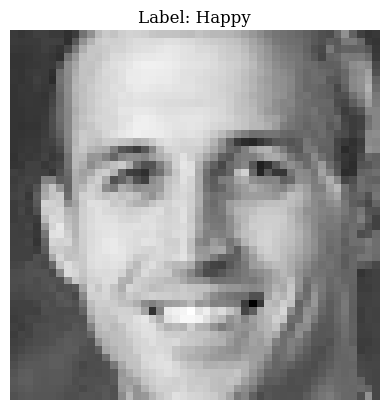

In [16]:
# Select a random image
n = np.random.randint(df_train.shape[0])
cutoff = X_train[n].reshape((48,48))
plt.imshow(cutoff,cmap='gray')
if y_train[n] == 0:
    target = 'UnHappy'
elif y_train[n] == 1:
    target = 'Happy'
plt.title(f"Label: {target}")
plt.axis('off')
plt.show()

HOG feature vector con 900 features


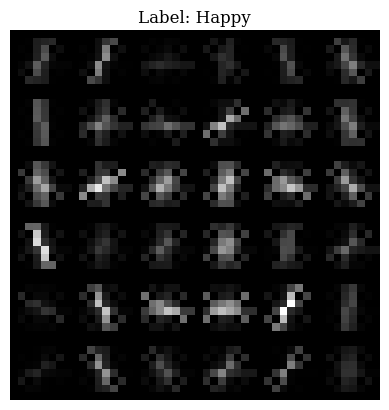

In [17]:
hog_feature_vector, hog_image = hog(cutoff, 
                                    orientations=9, 
                                    pixels_per_cell=(8,8), 
                                    cells_per_block=(2,2),
                                    visualize=True, # True if you want the HOG image, default value is False
                                      )
print(f"HOG feature vector con {len(hog_feature_vector)} features")
plt.imshow(hog_image,cmap='gray')
plt.axis('off')
plt.title(f"Label: {target}")
plt.show()

In [3]:
class DescriptorHOG(BaseEstimator, TransformerMixin):
    def __init__(self, hog_orientations = 9, hog_pixels_per_cell = (8,8), hog_cells_per_block=(2,2), hog_block_norm = 'L2', img_dim=(48,48)):
        self.hog_orientations = hog_orientations
        self.hog_pixels_per_cell = hog_pixels_per_cell
        self.hog_cells_per_block = hog_cells_per_block
        self.hog_block_norm = hog_block_norm
        self.img_dim = img_dim

    def fit(self, X, y=None):
        return self

    def feature_hog(self, arr):
        image = arr.reshape(self.img_dim)
        feature_vector = hog(image=image, orientations=self.hog_orientations,pixels_per_cell=self.hog_pixels_per_cell, 
                            cells_per_block=self.hog_cells_per_block, block_norm=self.hog_block_norm)
        return feature_vector

    def transform(self, X):
        X_hog = np.apply_along_axis(func1d=self.feature_hog, axis=1, arr=X)
        return X_hog


In [6]:
# Feature Descriptor

hog_descriptor = DescriptorHOG()
X_train_hog = hog_descriptor.transform(X=X_train)

# Dimensionality reduction
porc_inf = 0.90
pca = PCA(n_components=porc_inf, svd_solver='full')
X_train_hog_reduced = pca.fit_transform(X_train_hog)

dim_sample_hog = X_train_hog.shape[1]
dim_sample_hog_reduced = X_train_hog_reduced.shape[1]

print(f"Applying PCA (preserving {porc_inf*100}% of information), the data set reduces from {dim_sample_hog} to {dim_sample_hog_reduced} features")
print(f"Aproximately {round(1- (dim_sample_hog_reduced/dim_sample_hog),3)*100}% of the number of its previous features")

Applying PCA (preserving 90.0% of information), the data set reduces from 900 to 210 features
Aproximately 76.7% of the number of its previous features


## Classifier: Support Vector Machine

In [7]:
from sklearn.svm import SVC

In [8]:
temp=X_train.shape[1]
print(temp)

2304


The _**Support Vector Machine**_ algorithm is one of the most elegant algorithms in _Machine Learning_, also one of the most
powerful and used in different problems; with a good pre-processing of the data, the predictions become
similar to those of neural networks, an example is shown in the article
_Dimensionality Reduction for Handwritten Digit Recognition_ [3]

One of the most interesting features of this algorithm is the _kernel trick_, which in a few words, can transform the
dimensions of the data so that you can count the hyperplane that can classify the data, without compromising the effort
computational of the algorithm.

There are different types of _kernels_, but for this problem we will try the **Gaussian _Radial Basis Function_ kernel**. Is
it is a technique used when the available data are not linearly separable [1].

What this _kernel_ does is add _features_ via a similarity function (the **Gaussian _Radial Basis Function_**) that
measures how much an instance resembles a certain region or _landmark_ [1].

<img src="../../images/TDS-fer_without_ann_02.png" width=700px></img>

In the image above you can see how a set of data that **are not linearly separable** is transformed into another that
**if it is linearly separable** with the function **Gaussian _Radial Basis Function_**

($x_1$ is the original _feature_, $x_2$ and $x_3$ are the _features_ created by the function)

The implementation of this algorithm in Scikit-Learn is by declaring **`kernel = 'rbf'`** in the model

### Hyper-parameters of `SVC` with `kernel = 'rbf'`

The Equation 3 is the _kernel_ of **Gaussuan _Radial Basis Function_**

$$ \mathrm{K} (\mathbf{a}, \mathbf{b}) = \exp\left(-\gamma ||\mathbf{a}-\mathbf{b}||^{2}\right ) \tag{3}$$

where $\mathbf{a}$ and $\mathbf{b}$ are vectors, one of them (usually the second) is the _landmark_; and $\mathbf{\gamma}$
**is one of the hyper-parameters**.

Increasing $\gamma$ makes the bell shape of the curve narrower; as a result the range of influence of each instance
is smaller causing the _decision boundary_ to be a bit more jagged, sticking to individual instances. case contrary to
when $\gamma$ decreases, the shape of the curve is broader; instances have a greater range of influence and the _decision boundary_
it's a bit more "soft".

## The Pipeline

It is important to incorporate all the _features_ extraction processes within the same Pipeline. To do this, create a class
for _Histograms of Oriented Gradients_

```Python
from OwnTransformers.ImageDescriptors import DescriptorHOG
```

It is important that all the variables are on the same scale, so they will be standardized with
**`StandardScaler`**

The model would be the following:


```Python
Pipeline(
    steps= [
            ('hogdescriptor', DescriptorHOG()),
            ('pca', PCA(n_components=0.9, svd_solver='full')),
            ('scaler', StandardScaler()),
            ('svm', SVC(kernel='rbf', gamma= NUMBER, C = NUMBER))
            ]
        )
```

## First model

In [42]:
gamma_01 = 0.1
C_01 = 100
model_01 = Pipeline(steps= [
    ('hogdescriptor', DescriptorHOG()),
    ('pca', PCA(n_components=0.9, svd_solver='full')),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=C_01, gamma=gamma_01))
    ])

### Training the model

In [43]:
model_01.fit(X=X_train, y=y_train)

Pipeline(steps=[('hogdescriptor', DescriptorHOG()),
                ('pca', PCA(n_components=0.9, svd_solver='full')),
                ('scaler', StandardScaler()), ('svm', SVC(C=100, gamma=0.1))])

### Testing the model

In [45]:
# Make predictions
y_predict_01 = model_01.predict(X=X_test)

# Create ROC Curve + ROC AUC score
y_scores_01 = model_01.decision_function(X_test)
fpr_01, tpr_01, _ = roc_curve(y_true=y_test, y_score=y_scores_01)
roc_auc_01 = roc_auc_score(y_true=y_test, y_score= y_scores_01)

In [46]:
# Create Confussion Matrix
confMatrix = pd.DataFrame( confusion_matrix(y_true=y_test, y_pred=y_predict_01),
                         index = ['UnHappy', 'Happy'],
                         columns = ['UnHappy', 'Happy']
                         )
confMatrix.index.name = 'Actual'
confMatrix.columns.name = 'Predicted'

In [47]:
# Print classificacion metrics
print(f'Accuracy of the model: {accuracy_score(y_test,y_predict_01)}')
print(f'Precision of the model: {precision_score(y_test,y_predict_01)}')
print(f'Recall of the model: {recall_score(y_test,y_predict_01)}')
print(f'F1-Score of the model: {f1_score(y_test,y_predict_01)}')

Accuracy of the model: 0.6021185038066865
Precision of the model: 0.5961021505376344
Recall of the model: 1.0
F1-Score of the model: 0.7469473684210526


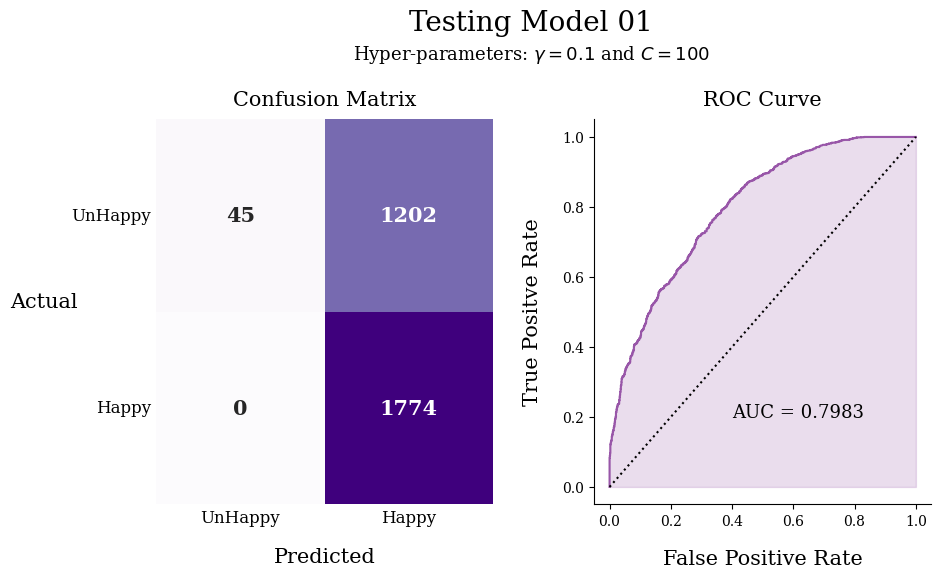

In [48]:
# Plot Confussion Matrix and ROC Curve
fig,(ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
fig.subplots_adjust(wspace=0.3)

# Heatmap
sns.heatmap(data=confMatrix, annot=True, fmt='d', square=False, cmap='Purples',vmin=0, cbar=False, ax=ax1,
annot_kws = {'size': 15, 'fontdict':{'fontweight':'bold'}}
)
# ROC Curve
ax2.plot(fpr_01, tpr_01, color='#9856A8')
ax2.fill_between(x=fpr_01, y1=tpr_01, color = '#9856A8', alpha=0.2)
ax2.text(x=0.4,y=0.2, s=f'AUC = {round(roc_auc_01,4)}', fontdict=dict(size=13))
# Randon classifier
ax2.plot([0,1],[0,1], linestyle='dotted', color='black')


fig.suptitle('Testing Model 01', size = 20,y=1.1)
fig.text(x=0.5,y=1, s=f'Hyper-parameters: $\gamma = {gamma_01}$ and $C = {C_01}$', ha='center', fontdict=dict(size=13))
ax1.set_title(f"Confusion Matrix", pad=10, size=15)
ax2.set_title('ROC Curve', pad=10, size=15)

ax1.set_ylabel('Actual',rotation=0, labelpad=20, size=15)
ax1.set_xlabel('Predicted', labelpad=15, size=15)
ax1.tick_params(axis='both', which='both', length=0)
ax1.tick_params(axis='y', rotation=0)
ax1.tick_params(labelsize=12)

ax2.set_xlabel('False Positive Rate', labelpad=15, size=15)
ax2.set_ylabel('True Positve Rate', labelpad=15, size=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()

Low performance is obtained with this model and its hyper-parameters. The confusion matrix shows high **True Negatives** leading to
a high _accuracy_; however **there is no detection of true positives**, resulting in the other metrics with values of 0.

## Fine-Tuned model

To improve the model you can change the hyper-parameters. Doing this task manually and keeping track of performances is tedious and
tired, **`GridSearchCV`** is used for this. What **`GridSearchCV`** returns is the model trained with the best hyper-parameters.

In [16]:
# Declare grid of hyper-parameters
dict_hyperparams = dict(svm__gamma=[0.001,0.01,0.1], svm__C = [1,10,100,1_000])

# Cross Validation for GridSearchCV
crossVal = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [17]:
model_02 = Pipeline(steps= [
    ('hogdescriptor', DescriptorHOG()),
    ('pca', PCA(n_components=0.9, svd_solver='full')),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
    ])

grid = GridSearchCV(
    estimator= model_02, # Model
    param_grid= dict_hyperparams, # hyper-parameters
    cv= crossVal, # Cross Validation
    n_jobs=-1, # Use all CPU's
    verbose= 5 # Info
)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('hogdescriptor', DescriptorHOG()),
                                       ('pca',
                                        PCA(n_components=0.9,
                                            svd_solver='full')),
                                       ('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [1, 10, 100, 1000],
                         'svm__gamma': [0.001, 0.01, 0.1]},
             verbose=5)

In [22]:
saved_model = pickle.dumps(grid)
  
# Load the pickled model
svm_from_pickle = pickle.loads(saved_model)
  

In [7]:

# Save the model as a pickle in a file
# joblib.dump(grid, 'model_2.pkl')
# joblib.dump(grid.best_estimator_, 'model_02_best_para.pkl')
# Load the model from the file
model_load = joblib.load('filename.pkl')

# Use the loaded model to make predictions
# knn_from_joblib.predict(X_test)


In [10]:
img_2= r'C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER/MRP.jpg'
test=image_to_dataframe(file_path=img_2)


In [11]:
pred=model_load.predict(X=test)

In [12]:
res=(int(pred))
if res==1:
    print("Prediction says: Happy")
else:
    print("Prediction says: UnHappy")

Prediction says: UnHappy


In [31]:
# Best params
gamma_02 = grid.best_params_['svm__gamma']
C_02 = grid.best_params_['svm__C']

### Testing Model 02

In [32]:
# Make predictions
y_predict_02 = grid.predict(X=X_test)

# Create ROC Curve + ROC AUC score
y_scores_02 = grid.decision_function(X_test)
fpr_02, tpr_02, _ = roc_curve(y_true=y_test, y_score=y_scores_02)
roc_auc_02 = roc_auc_score(y_true=y_test, y_score= y_scores_02)

In [33]:
# Create Confussion Matrix
confMatrix_02 = pd.DataFrame( confusion_matrix(y_true=y_test, y_pred=y_predict_02),
                         index = ['UnHappy', 'Happy'],
                         columns = ['UnHappy', 'Happy']
                         )
confMatrix_02.index.name = 'Actual'
confMatrix_02.columns.name = 'Predicted'

In [34]:
# Print classificacion metrics
print(f'Accuracy of the model: {accuracy_score(y_test,y_predict_02)}')
print(f'Precision of the model: {precision_score(y_test,y_predict_02)}')
print(f'Recall of the model: {recall_score(y_test,y_predict_02)}')
print(f'F1-Score of the model: {f1_score(y_test,y_predict_02)}')

Accuracy of the model: 0.8182720953326713
Precision of the model: 0.8408458542014469
Recall of the model: 0.8517474633596392
F1-Score of the model: 0.8462615513861664


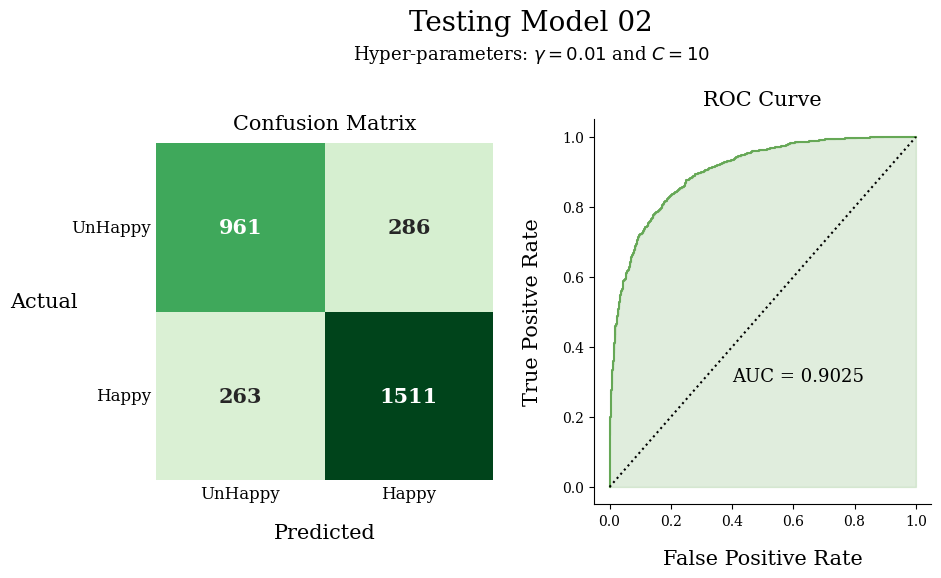

In [35]:
# Plot Confussion Matrix and ROC Curve
fig,(ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
fig.subplots_adjust(wspace=0.3)

sns.heatmap(data=confMatrix_02, annot=True, fmt='d', square=True, cmap='Greens',vmin=0, cbar=False, ax=ax1,
annot_kws = {'size': 15, 'fontdict':{'fontweight':'bold'}}
)

ax2.plot(fpr_02, tpr_02, color='#66A856')
ax2.fill_between(x=fpr_02, y1=tpr_02, color = '#66A856', alpha=0.2)
ax2.text(x=0.4,y=0.3, s=f'AUC = {round(roc_auc_02,4)}', fontdict=dict(size=13))
ax2.plot([0,1],[0,1], linestyle='dotted', color='black')


fig.suptitle('Testing Model 02', size = 20,y=1.1)
fig.text(x=0.5,y=1, s=f'Hyper-parameters: $\gamma = {gamma_02}$ and $C = {C_02}$', ha='center', fontdict=dict(size=13))
ax1.set_title(f"Confusion Matrix", pad=10, size=15)
ax2.set_title('ROC Curve', pad=10, size=15)


ax1.set_ylabel('Actual',rotation=0, labelpad=20, size=15)
ax1.set_xlabel('Predicted', labelpad=15, size=15)
ax1.tick_params(axis='both', which='both', length=0)
ax1.tick_params(axis='y', rotation=0)
ax1.tick_params(labelsize=12)

ax2.set_xlabel('False Positive Rate', labelpad=15, size=15)
ax2.set_ylabel('True Positve Rate', labelpad=15, size=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.show()

In [9]:
# with open('filename.pkl', 'rb') as file:
      
#     # Call load method to deserialze
#     myvar = pickle.load(file)

# myvar = pickle.loads('C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/notebooks/filename.pkl')
# model=pickle.load(open('C:/Users/Rishi Arora/OneDrive/Documents/Sem V/Machine Learning/FER_SVM/notebooks/filename.pkl','rb'))
# prevents openCL usage and unnecessary logging messages
cv.ocl.setUseOpenCL(False)

# dictionary which assigns each label an emotion (alphabetical order)
emotion_dict = {0: "UnHappy", 1: "Happy"}

# start the webcam feed
cap = cv.VideoCapture(0)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv.resize(roi_gray, (48, 48)), -1), 0)
        X_test=image_to_inp(cropped_img)
        prediction = model_load.predict(X=X_test)
        cv.putText(frame, emotion_dict[int(prediction)], (x+20, y-60), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)

    cv.imshow('Video', cv.resize(frame,(1600,960),interpolation = cv.INTER_CUBIC))
    if cv.waitKey(1) & 0xFF == ord('q'):
            break
            
cap.release()
cv.destroyAllWindows()



In [7]:
cap.release()
cv.destroyAllWindows()

After applying **`GridSearchCV`**, the best hyper-parameters for the SVM are found, and compared to the previous model, the
predictions improve by a lot. The model achieves a large percentage and good balance to classify positive class faces that are
actually correct than predicted without having many false alarms (high **F1-Score**).

The ROC AUC and the shape of the ROC curve show a good prediction model.

## Conclusion

Some of the conclusions of this project are:

* The best classification model is the second, where there is a high value of **F1-Score**, the ideal metric to prioritize equally
the _**Precision**_ and _**Recall**_.

* Reducing the dimensions has helped to reduce the training time, since using the more than four thousand _features_
Initially, the SVM algorithm would have been saturated.

* Knowing what hyperparameters are and what they mean in each type of _Machine Learning_ algorithm is key to being able to adjust them
and thus achieve a better performance of the model.

* Learned new and/or reinforced knowledge of concepts such as
    * **Histograms of Oriented Gradients**: A quite useful _feature descriptor_ to know what is most relevant in an image. The creation
    of a class so that this descriptor could enter inside the Pipeline has future applications, since its
    hyper-parameters to improve the performance of some model.
    * **Principal Component Analysis**: Although choosing the number of dimensions to reduce can be a very subjective task (detect
    elbow of the graph), it is very useful to be able to choose the proportion of information that you want to keep.

* Take complex problems, which have been treated with _Deep Learning_, and try to solve them with classic _Machine Learning_ algorithms
It can be of great help for a better understanding of concepts seen and the application of new ones. I also think that doing this shows the
ability to solve problems by being able to take different perspectives in the same situation.